In [1]:
import cv2
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from perspective2d import PerspectiveFields
from perspective2d.utils import draw_perspective_fields, draw_from_r_p_f_cx_cy

/home/jinlinyi/miniforge3/envs/pfinference/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# List available versions/models of the PerspectiveFields
PerspectiveFields.versions()

Paramnet-360Cities-edina-centered
   - Trained on 360cities and EDINA dataset. Assumes centered principal point. Predicts roll, pitch and fov.
Paramnet-360Cities-edina-uncentered
   - Trained on 360cities and EDINA dataset. Predicts roll, pitch, fov and principal point.
PersNet-360Cities
   - Trained on 360cities. Predicts perspective fields.
PersNet_Paramnet-GSV-uncentered
   - Trained on GSV. Predicts roll, pitch, fov and principal point.
PersNet_Paramnet-GSV-centered
   - Trained on GSV. Assumes centered principal point. Predicts roll, pitch and fov.


dict_keys(['pred_gravity', 'pred_gravity_original', 'pred_latitude', 'pred_latitude_original', 'pred_latitude_original_mode', 'pred_roll', 'pred_pitch', 'pred_vfov', 'pred_rel_focal', 'pred_general_vfov', 'pred_rel_cx', 'pred_rel_cy'])
roll: 20.19 deg
pitch: -68.75 deg
fov: 65.36 deg


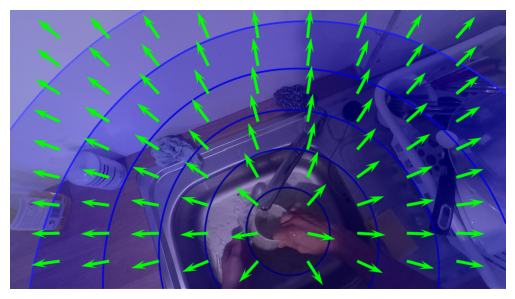

In [3]:
# Load an image
img_bgr = cv2.imread('../assets/imgs/epic.png')

# Select a model for Perspective Field inference
# In this example we assume the input image has centered principal point
version = 'Paramnet-360Cities-edina-centered'
# Initialize the model and set it to evaluation mode and move it to GPU for faster processing
pf_model = PerspectiveFields(version).eval().cuda()

# Perform inference to get predictions
predictions = pf_model.inference(img_bgr=img_bgr)

# Print the keys of the predictions dictionary
print(predictions.keys())

# Visualize the predictions (roll, pitch, fov, and principal point ([0,0] in this model)) on the image
param_vis = draw_from_r_p_f_cx_cy(
    img_bgr[...,::-1],
    predictions["pred_roll"].item(),
    predictions["pred_pitch"].item(),
    predictions["pred_general_vfov"].item(),
    predictions["pred_rel_cx"].item(),
    predictions["pred_rel_cy"].item(),
    "deg",
    up_color=(0, 1, 0),
).astype(np.uint8)

plt.axis('off')
plt.imshow(param_vis)

# Print the predicted values for roll, pitch, and fov
print(f"roll: {predictions['pred_roll'].item() :.2f} deg")
print(f"pitch: {predictions['pred_pitch'].item() :.2f} deg")
print(f"fov: {predictions['pred_general_vfov'].item() :.2f} deg")

dict_keys(['pred_gravity', 'pred_gravity_original', 'pred_latitude', 'pred_latitude_original', 'pred_latitude_original_mode'])


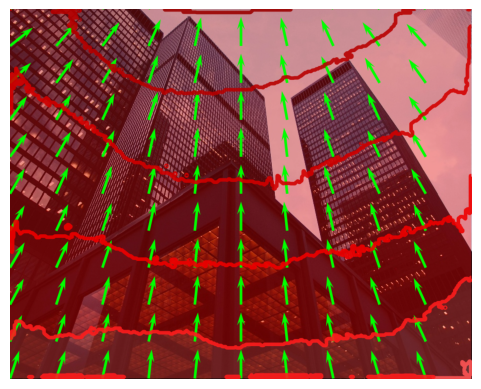

In [4]:
# Change the version
# In this case, we only want to predict the perspective fields without predicting camera parameters
version = 'PersNet-360Cities'
pf_model = PerspectiveFields(version).eval().cuda()


img_bgr = cv2.imread('../assets/imgs/cityscape.jpg')
predictions = pf_model.inference(img_bgr=img_bgr)

# Print the keys of the predictions dictionary, 
# notice this model does not has ParamNet so there's no camera parameters predicted
print(predictions.keys())

# Draw and visualize the perspective fields based on the predictions
pred_field = draw_perspective_fields(
    img_bgr[...,::-1], 
    predictions["pred_gravity_original"].cpu().detach(), 
    torch.deg2rad(predictions["pred_latitude_original"].cpu().detach()), 
    color=(0,1,0),
)

plt.axis('off')
plt.imshow(pred_field)
    